<a href="https://colab.research.google.com/github/Mephod1y/DataScience/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [49]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [45]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [50]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [29]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=[784,]))
model.add(Dropout(0,2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=512,
    validation_data=(X_valid, y_valid)
)

Epoch 1/100
108/108 [==============================] - 1s 8ms/step - loss: 0.7072 - accuracy: 0.7594 - val_loss: 0.4593 - val_accuracy: 0.8418
Epoch 2/100
108/108 [==============================] - 1s 8ms/step - loss: 0.4384 - accuracy: 0.8455 - val_loss: 0.4080 - val_accuracy: 0.8538
Epoch 3/100
108/108 [==============================] - 1s 8ms/step - loss: 0.3957 - accuracy: 0.8599 - val_loss: 0.3738 - val_accuracy: 0.8668
Epoch 4/100
108/108 [==============================] - 1s 8ms/step - loss: 0.3652 - accuracy: 0.8700 - val_loss: 0.3682 - val_accuracy: 0.8670
Epoch 5/100
108/108 [==============================] - 1s 11ms/step - loss: 0.3419 - accuracy: 0.8763 - val_loss: 0.3408 - val_accuracy: 0.8800
Epoch 6/100
108/108 [==============================] - 1s 9ms/step - loss: 0.3218 - accuracy: 0.8820 - val_loss: 0.3257 - val_accuracy: 0.8826
Epoch 7/100
108/108 [==============================] - 1s 7ms/step - loss: 0.3148 - accuracy: 0.8864 - val_loss: 0.3334 - val_accuracy: 0.881

In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


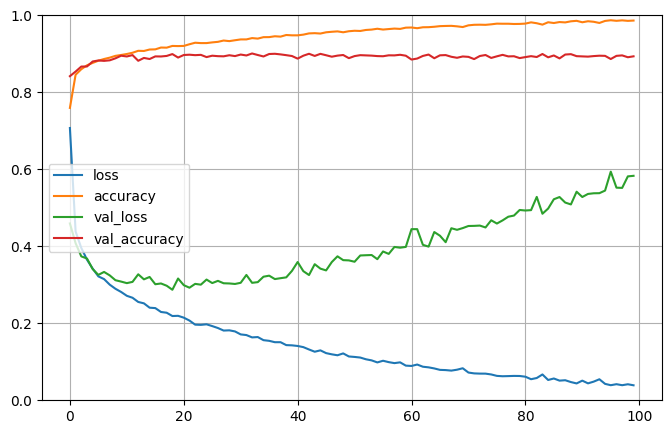

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 0s 1ms/step


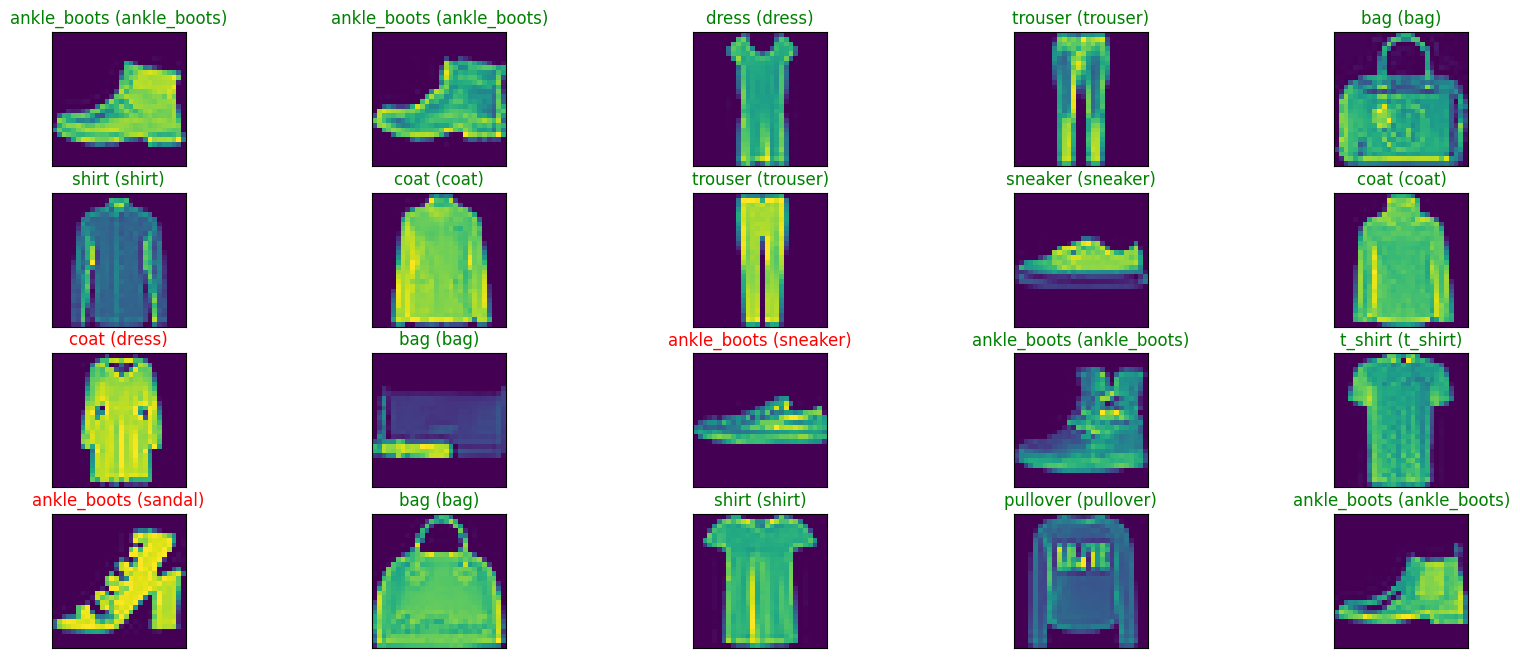

In [51]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)
X_test = X_test.reshape(10000, 28, 28)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
    ax = figure.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Висновок: зі збільшенням кількості епох точніх передбачень зростає. При 100 епохах точність сягає 98,6%. З 20ти зображень лише 3 помилки.